In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
files = os.listdir("../raw/results")

In [35]:
base_address = "../raw/results/"
df = pd.DataFrame()
for file in files:
    series = pd.read_csv(f"{base_address}{file}", header=None)[2]
    df[file.split(".")[0]] = series

In [36]:
df

,MAR-325__train_f1,MAR-330__train_f1,MAR-335__train_f1,MAR-329__train_f1,MAR-332__train_f1,MAR-324__train_f1,MAR-336__train_f1,MAR-338__train_f1,MAR-333__train_f1,MAR-337__train_f1,MAR-328__train_f1,MAR-327__train_f1,MAR-326__train_f1,MAR-339__train_f1,MAR-331__train_f1
0,0.490476,0.377778,0.355556,0.281481,0.323810,0.314815,0.361905,0.277778,0.488889,0.433333,0.206349,0.250000,0.301587,0.206349,0.228571
1,0.340476,0.335185,0.422222,0.251462,0.298990,0.162963,0.367521,0.270677,0.308772,0.358974,0.309524,0.343434,0.335185,0.254545,0.257631
2,0.347034,0.312169,0.368132,0.361111,0.246753,0.233446,0.324045,0.249084,0.279202,0.308378,0.329966,0.305263,0.225885,0.344444,0.244444
3,0.294613,0.334637,0.370370,0.306607,0.281481,0.287347,0.296667,0.240594,0.249455,0.304598,0.390152,0.280864,0.288889,0.374253,0.262951
4,0.272875,0.324786,0.360914,0.361111,0.273148,0.317629,0.345679,0.282187,0.230700,0.323082,0.372685,0.270833,0.250204,0.335673,0.349464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,0.432160,0.885192,0.909563,0.909350,0.898812,0.434547,0.912967,0.899921,0.901997,0.921341,NaN,0.434700,0.436725,0.914972,0.912531
7520,0.432110,0.885224,0.909553,0.909343,0.898770,0.434495,0.912956,0.899948,0.901953,0.921294,NaN,0.434723,0.436711,0.914961,0.912524
7521,0.432133,0.885261,0.909577,0.909331,0.898796,0.434555,0.912946,0.899941,0.901910,0.921316,NaN,0.434794,0.436669,0.914983,0.912514
7522,0.432128,0.885297,0.909569,0.909354,0.898793,0.434597,0.912970,0.899932,0.901830,0.921337,NaN,0.434836,0.436617,0.914971,0.912536


In [5]:
threshold = 0.1  # Set a threshold for clipping
df['CUA_Average'] = df[["MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1", "MAR-329__train_f1"]].mean(axis=1)
df['CUA_Average'] = df['CUA_Average'].clip(upper=df['CUA_Average'].quantile(0.6))  # Clip values above the 95th percentile
df['CUA_RollingMean'] = df['CUA_Average'].rolling(window=100).mean()
df['CUA_RollingStd'] = df['CUA_Average'].rolling(window=100).std()
# Calculate the upper and lower bounds for the shaded area
df['CUA_UpperBound'] = df['CUA_RollingMean'] + df['CUA_RollingStd']
df['CUA_LowerBound'] = df['CUA_RollingMean'] - df['CUA_RollingStd']

In [134]:
df['CUA_Average'] = df[["MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1", "MAR-329__train_f1"]].mean(axis=1)
df['CUA_RollingMean'] = df['CUA_Average'].ewm(span=100, adjust=False).mean()

# Calculate the rolling IQR
rolling_window = df['CUA_Average'].rolling(window=100)
df['CUA_RollingIQR'] = rolling_window.quantile(0.75) - rolling_window.quantile(0.25)

# Calculate the upper and lower bounds for the shaded area
df['CUA_UpperBound'] = df['CUA_RollingMean'] + df['CUA_RollingIQR']
df['CUA_LowerBound'] = df['CUA_RollingMean'] - df['CUA_RollingIQR']

In [136]:
df['CUA_Average'] = df[["MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1", "MAR-329__train_f1"]].mean(axis=1)
df['CUA_RollingMean'] = df['CUA_Average'].ewm(span=100, adjust=False).mean()
df['CUA_RollingStd'] = df['CUA_Average'].rolling(window=100).std()

# Apply logarithmic transformation
df['CUA_LogStd'] = np.log1p(df['CUA_RollingStd'])

# Calculate the upper and lower bounds for the shaded area
df['CUA_UpperBound'] = df['CUA_RollingMean'] + df['CUA_LogStd']
df['CUA_LowerBound'] = df['CUA_RollingMean'] - df['CUA_LogStd']

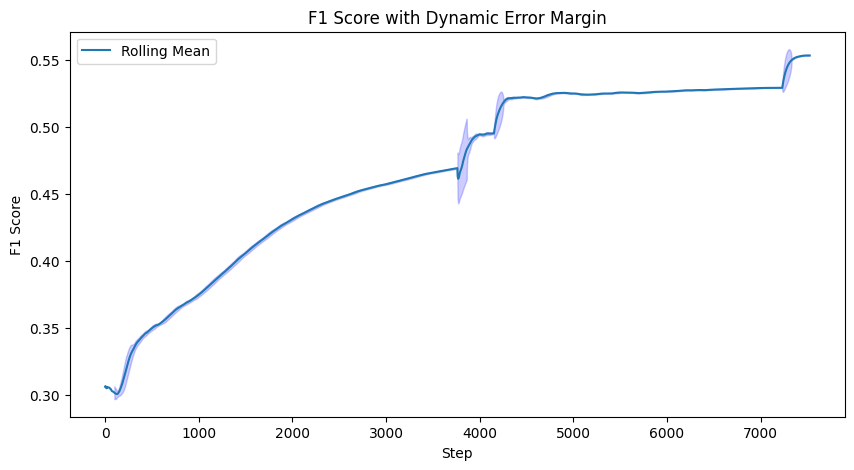

In [137]:
# Plot the data using Seaborn
plt_df = df.iloc[0: 8000]
plt.figure(figsize=(10, 5))
sns.lineplot(data=plt_df, x=plt_df.index, y='CUA_RollingMean', label='Rolling Mean')
plt.fill_between(plt_df.index, plt_df['CUA_LowerBound'], plt_df['CUA_UpperBound'], color='b', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')
plt.title('F1 Score with Dynamic Error Margin')
plt.legend()
plt.show()

In [129]:
threshold = 0.1  # Set a threshold for clipping
df['CA_Average'] = df[["MAR-329__train_f1", "MAR-330__train_f1", "MAR-331__train_f1", "MAR-332__train_f1", "MAR-333__train_f1"]].mean(axis=1)
df['CA_Average'] = df['CA_Average'].clip(upper=df['CA_Average'].quantile(0.8))  # Clip values above the 95th percentile
df['CA_RollingMean'] = df['CA_Average'].rolling(window=100).mean()
df['CA_RollingStd'] = df['CA_Average'].rolling(window=100).std()
# Calculate the upper and lower bounds for the shaded area
df['CA_UpperBound'] = df['CA_RollingMean'] + df['CA_RollingStd']
df['CA_LowerBound'] = df['CA_RollingMean'] - df['CA_RollingStd']

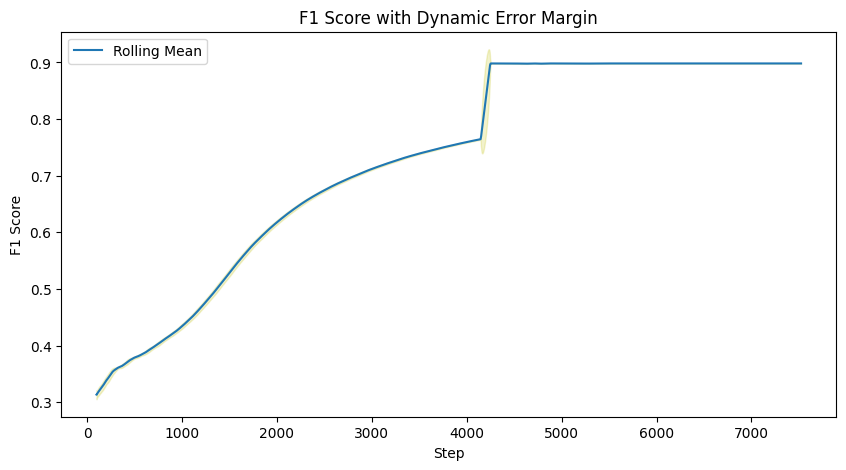

In [130]:
# Plot the data using Seaborn
plt_df = df.iloc[0: 8000]
plt.figure(figsize=(10, 5))
# sns.lineplot(data=plt_df, x=plt_df.index, y='CUA_RollingMean', label='Rolling Mean')
sns.lineplot(data=plt_df, x=plt_df.index, y='CA_RollingMean', label='Rolling Mean')
# plt.fill_between(plt_df.index, plt_df['CUA_LowerBound'], plt_df['CUA_UpperBound'], color='b', alpha=0.2)
plt.fill_between(plt_df.index, plt_df['CA_LowerBound'], plt_df['CA_UpperBound'], color='y', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')
plt.title('F1 Score with Dynamic Error Margin')
plt.legend()
plt.show()

In [8]:
import math


def smooth(last, value):
    # Weighted average if last value is known, else just return the value
    return (
        weight * last + (1 - weight) * value if math.isfinite(last) else value
    )


def lowPassFilter(val):
    if val == 0 or val[1] == 0:
        return 0

    low = smooth(0, val[0])
    mid = smooth(0, val[1])
    high = smooth(0, val[2])

    return [low, mid, high]


def smoothData(data, smoothingValue):

    if len(data) == 0:
        return data

    global weight
    weight = 1 if smoothingValue > 100 else (smoothingValue - 1) / 100

    colCount = len(data[0])

    newData = dict()
    for i in range(len(data)):
        for k in range(1, colCount):
            newData[data[i][0]] = lowPassFilter(data[i][k])

    return newData

In [146]:
data = smoothData(
    data=[
        [0, [1, 1, 1]],
        [1, [2, 2, 2]],
        [2, [3, 3, 3]],
        [3, [4, 4, 4]],
        [4, [5, 5, 5]],
        [5, [6, 6, 6]],
        [6, [7, 7, 7]],
        [7, [8, 8, 8]],
        [8, [9, 9, 9]],
        [9, [10, 10, 10]],
        [10, [11, 11, 11]],
    ],
    smoothingValue=100,
)

print(data)

{0: [0.010000000000000009, 0.010000000000000009, 0.010000000000000009], 1: [0.020000000000000018, 0.020000000000000018, 0.020000000000000018], 2: [0.030000000000000027, 0.030000000000000027, 0.030000000000000027], 3: [0.040000000000000036, 0.040000000000000036, 0.040000000000000036], 4: [0.050000000000000044, 0.050000000000000044, 0.050000000000000044], 5: [0.06000000000000005, 0.06000000000000005, 0.06000000000000005], 6: [0.07000000000000006, 0.07000000000000006, 0.07000000000000006], 7: [0.08000000000000007, 0.08000000000000007, 0.08000000000000007], 8: [0.09000000000000008, 0.09000000000000008, 0.09000000000000008], 9: [0.10000000000000009, 0.10000000000000009, 0.10000000000000009], 10: [0.1100000000000001, 0.1100000000000001, 0.1100000000000001]}


In [183]:
df.columns

Index(['MAR-325__train_f1', 'MAR-330__train_f1', 'MAR-335__train_f1',
       'MAR-329__train_f1', 'MAR-332__train_f1', 'MAR-324__train_f1',
       'MAR-336__train_f1', 'MAR-338__train_f1', 'MAR-333__train_f1',
       'MAR-337__train_f1', 'MAR-328__train_f1', 'MAR-327__train_f1',
       'MAR-326__train_f1', 'MAR-339__train_f1', 'MAR-331__train_f1',
       'CA_Average', 'CA_Min', 'CA_Max', 'CUA_Average', 'CUA_Min', 'CUA_Max'],
      dtype='object')

In [46]:
CA_cols = ["MAR-329__train_f1", "MAR-330__train_f1", "MAR-331__train_f1", "MAR-332__train_f1", "MAR-333__train_f1"]
CUA_cols = ["MAR-324__train_f1", "MAR-325__train_f1", "MAR-326__train_f1", "MAR-327__train_f1", "MAR-328__train_f1"]
TCA_cols = ["MAR-339__train_f1", "MAR-335__train_f1", "MAR-336__train_f1", "MAR-337__train_f1", "MAR-338__train_f1"]
# Calculate the average, min, and max
df['CA_Average'] = df[CA_cols].mean(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CA_Average'].quantile(0.95))
df['CA_Min'] = df[CA_cols].min(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CA_Average'].quantile(0.95))
df['CA_Max'] = df[CA_cols].max(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CA_Average'].quantile(0.95))
# Calculate the average, min, and max
df['CUA_Average'] = df[CUA_cols].mean(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CUA_Average'].quantile(0.95))
df['CUA_Min'] = df[CUA_cols].min(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CUA_Average'].quantile(0.95))
df['CUA_Max'] = df[CUA_cols].max(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['CUA_Average'].quantile(0.95))
# Calculate the average, min, and max
df['TCA_Average'] = df[TCA_cols].mean(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['TCA_Average'].quantile(0.95))
df['TCA_Min'] = df[TCA_cols].min(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['TCA_Average'].quantile(0.95))
df['TCA_Max'] = df[TCA_cols].max(axis=1).ewm(span=500, adjust=False).mean().clip(upper=df['TCA_Average'].quantile(0.95))

In [9]:
# Prepare data for smoothing
data_for_smoothing = [[i, [df['CUA_Min'][i], df['CUA_Average'][i], df['CUA_Max'][i]]] for i in range(len(df))]

# Apply the smoothing function
smoothed_data = smoothData(data_for_smoothing, smoothingValue=100)

# Convert smoothed data back to DataFrame
smoothed_CUA_df = pd.DataFrame(smoothed_data).T
smoothed_CUA_df.columns = ['CUA_Min', 'CUA_Average', 'CUA_Max']
smoothed_CUA_df["CUA_Average"] = smoothed_CUA_df["CUA_Average"].rolling(100).mean()
smoothed_CUA_df["CUA_Min"] = smoothed_CUA_df["CUA_Min"].rolling(100).mean()
smoothed_CUA_df["CUA_Max"] = smoothed_CUA_df["CUA_Max"].rolling(100).mean()

In [10]:
# Prepare data for smoothing
data_for_smoothing = [[i, [df['CA_Min'][i], df['CA_Average'][i], df['CA_Max'][i]]] for i in range(len(df))]

# Apply the smoothing function
smoothed_data = smoothData(data_for_smoothing, smoothingValue=100)

# Convert smoothed data back to DataFrame
smoothed_CA_df = pd.DataFrame(smoothed_data).T
smoothed_CA_df.columns = ['CA_Min', 'CA_Average', 'CA_Max']
smoothed_CA_df["CA_Average"] = smoothed_CA_df["CA_Average"].ewm(span=100, adjust=False).mean()
smoothed_CA_df["CA_Min"] = smoothed_CA_df["CA_Min"].rolling(30).mean()
smoothed_CA_df["CA_Max"] = smoothed_CA_df["CA_Max"].rolling(30).mean()

In [12]:
final_df = pd.concat([smoothed_CA_df, smoothed_CUA_df, smoothed_TCA_df], axis=1)

In [339]:
def tuftefy(ax):
    """Remove spines and tick position markers to reduce ink."""
    # 
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["bottom"].set_color('grey')

    ax.grid(color="w", alpha=0.5)
    ax.get_yaxis().grid(True)
    ax.get_xaxis().grid(False)

In [40]:
df = df * 100

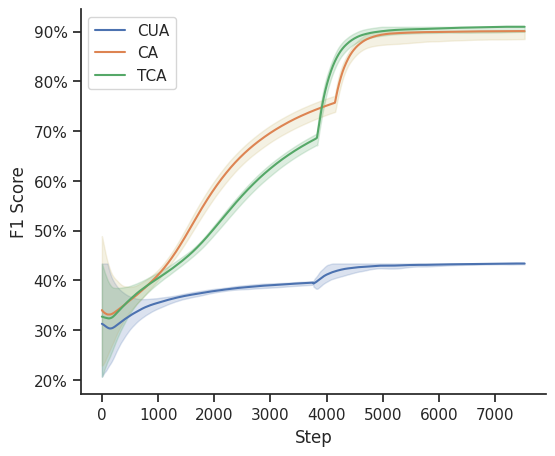

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Function to format the ticks with a percent sign
def percent_formatter(x, pos):
    return f'{x:.0f}%'

plt.figure(figsize=(6, 5))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.lineplot(data=df, x=df.index, y='CUA_Average', label='CUA')
plt.fill_between(df.index, df['CUA_Min'], df['CUA_Max'], color='b', alpha=0.2)
sns.lineplot(data=df, x=df.index, y='CA_Average', label='CA')
plt.fill_between(df.index, df['CA_Min'], df['CA_Max'], color='y', alpha=0.2)
sns.lineplot(data=df, x=df.index, y='TCA_Average', label='TCA')
plt.fill_between(df.index, df['TCA_Min'], df['TCA_Max'], color='g', alpha=0.2)
plt.xlabel('Step')
plt.ylabel('F1 Score')

# Apply the percent formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.legend()
plt.savefig('f1_score_plot.png', dpi=300, bbox_inches='tight')
plt.show()
